In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys # insert here the directory in which you have saved the file AppliedStatistics.py
sys.path.append(r"C:\Users\angelo\Documents\Python Scripts\AppliedStatisticsRoutines")
sys.path.append(r"C:\Users\angelo\Documents\ownCloud\Python Scripts\AppliedStatisticsRoutines")
sys.path.append(r"W:\TH-Valleriani\AngeloSynchFold\Python Scripts\AppliedStatisticsRoutines")
sys.path.append(r"C:\MyDirectory\AppliedStatisticsRoutines")
import AppliedStatistics as appst
import importlib

*** Welcome to AppliedStatistics ***

Author: Angelo Valleriani
Affiliation: Max Planck Institute of Colloids and Interfaces
Contact: angelo.valleriani@mpikg.mpg.de
License: unlicensed (http://unlicense.org/)

Best use as: >>>import AppliedStatistics as appst

You are using AppliedStatistics version 2.1.2


#### References:

All exercise and data are taken from: 

Hogg, Tanis, Zimmerman, "Probability and Statistical Inference", Tenth Edition, Pearson

## one-way ANOVA

#### Exercise 38

The female cuckoo lays their eggs in other birds’ nests. The idea is that the nest is chosen based on the size of the eggs, in order to deceive the “foster parents”. The sizes of cuckoos eggs (in mm) found in the nests of three types of birds were collected. 

An ANOVA test should reveal if one or all of them are different in mean.

In [2]:
# 9.3-05
data = pd.read_csv("Exercise38.csv")
data.head()

Sparrow  Robin  Wren
0     22.0   21.8  19.8
1     23.9   23.0  22.1
2     20.9   23.3  21.5
3     23.8   22.4  20.9
4     25.0   23.0  22.0

In [3]:
data.tail()

Sparrow  Robin  Wren
11     23.5   22.6  20.0
12     23.0   22.0  20.8
13     23.0   22.1  21.2
14      NaN   21.1  21.0
15      NaN   23.0   NaN

From the tail of the data frame we see that the samples are not all equal.

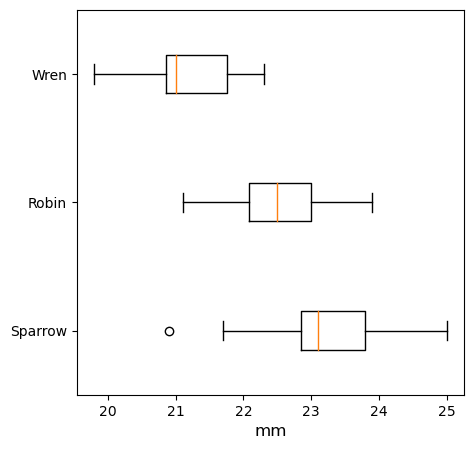

In [4]:
x = [np.array(data[i].dropna()) for i in data.keys()] 
plt.figure(figsize=(5,5))
plt.boxplot(x, vert=False, labels=tuple(data.keys()))
plt.xlabel("mm", fontsize = 12)
plt.show()

In [5]:
data_table = np.array(data).T # rows are the conditions, columns the measurements
c = data_table.shape[0]
X_bar_i = np.nanmean(data_table, axis =1)
print("The mean values of each condition are:", X_bar_i.round(2))
X_bar = np.nanmean(data_table)
print("The grand mean is:", round(X_bar,2))
Ni = np.sum(~np.isnan(data_table), axis = 1)
print("The sample sizes are:", Ni)
N = np.sum(Ni)
print("The sum of all sample sizes is N =", N)

The mean values of each condition are: [23.11 22.56 21.12]
The grand mean is: 22.25
The sample sizes are: [14 16 15]
The sum of all sample sizes is N = 45


In [6]:
Sc = np.sum(Ni*(X_bar_i - X_bar)**2)
print("The between group variability is:", round(Sc,2), "with", c-1, "dof")
Se = np.nansum((data_table - X_bar_i.reshape(-1,1))**2)
print("The within group variability is:", round(Se,2), "with", N-c, "dof")

The between group variability is: 31.11 with 2 dof
The within group variability is: 29.26 with 42 dof


In [7]:
F = (Sc/(c-1))/(Se/(N-c))
print("The value of the statistic is F =", round(F,2))

The value of the statistic is F = 22.33


In [8]:
from scipy.stats import f as f_dist
alpha = 0.05
F_crit = f_dist.ppf(1-alpha,c-1,N-c)
print("The critical value for the statistic is F_crit =", round(F_crit,2))
p_value = 1 - f_dist.cdf(F,c-1,N-c)
print("The p-value for this test is p =", round(p_value,2))

The critical value for the statistic is F_crit = 3.22
The p-value for this test is p = 0.0


In [9]:
anova_results = appst.one_way_ANOVA(data_table)

The within sum of squares is: 29.261 with 42 dof

The between sum of squares is: 31.112 with 2 dof

The total sum of squares is: 60.372 with 44 dof

The value of the statistic f is: 22.329

The critical value for the statistic is: 3.22

The null hypothesis can be rejected at significance level 0.05
The p-value with the F-distribution is less than 0.001
The two-sided 95.0% interval estimate of the population mean from sample 1 is: [22.508, 23.72]
The two-sided 95.0% interval estimate of the population mean from sample 2 is: [22.193, 22.92]
The two-sided 95.0% interval estimate of the population mean from sample 3 is: [20.702, 21.538]


Pairwise analysis to find out which population is different

In [10]:
sparrow, robin, wren = x

In [11]:
# effective alpha_e
alpha_e = round(1 - (1-alpha)**(1/3),3)

In [12]:
two_results = appst.t_test_means_two_indep_samples(X = sparrow, Y = robin, alpha = alpha_e)

The size of sample X is: 14
The point estimate of the mean of X is: 23.114 units
The point estimate of the variance of X is: 1.101 units^2

The size of sample Y is: 16
The point estimate of the mean of Y is: 22.556 units
The point estimate of the variance of Y is: 0.465 units^2

The value of the statistic is, t = 1.748

The critical region for the rejection of the null hypothesis is outside the interval:
( -2.538 , 2.538 )

The statistic is outside the critical region: the null hypothesis cannot be rejected with significance level 0.017

The approximate p-value associated to this test is: 0.091

The 98.3% two-sided interval estimate of the difference of the means is: (-0.252, 1.368) units
The confidence interval contains 0. Do not reject the null hypothesis.


In [13]:
two_results = appst.t_test_means_two_indep_samples(X = sparrow, Y = wren, alpha = alpha_e)

The size of sample X is: 14
The point estimate of the mean of X is: 23.114 units
The point estimate of the variance of X is: 1.101 units^2

The size of sample Y is: 15
The point estimate of the mean of Y is: 21.12 units
The point estimate of the variance of Y is: 0.569 units^2

The value of the statistic is, t = 5.908

The critical region for the rejection of the null hypothesis is outside the interval:
( -2.544 , 2.544 )

The statistic is inside the critical region: the null hypothesis can be rejected with significance level 0.017

The approximate p-value associated to this test is: 0.0

The 98.3% two-sided interval estimate of the difference of the means is: (1.136, 2.853) units
The confidence interval does not contain 0. This should confirm rejection of the null hypothesis.


In [14]:
two_results = appst.t_test_means_two_indep_samples(X = robin, Y = wren, alpha = alpha_e)

The size of sample X is: 16
The point estimate of the mean of X is: 22.556 units
The point estimate of the variance of X is: 0.465 units^2

The size of sample Y is: 15
The point estimate of the mean of Y is: 21.12 units
The point estimate of the variance of Y is: 0.569 units^2

The value of the statistic is, t = 5.567

The critical region for the rejection of the null hypothesis is outside the interval:
( -2.532 , 2.532 )

The statistic is inside the critical region: the null hypothesis can be rejected with significance level 0.017

The approximate p-value associated to this test is: 0.0

The 98.3% two-sided interval estimate of the difference of the means is: (0.783, 2.09) units
The confidence interval does not contain 0. This should confirm rejection of the null hypothesis.


## Conclusions

In this unit, you have learned to use the one-way ANOVA, which is a method to test for the equality of the means of more than two populations.

One important assumption is the normality condition and the fact that all population have the same variance. In case of strong deviations from normality, other methods (e.g. Kruskal-Wallis) may be used.

When the ANOVA analysis is applied and the H0 is rejected, a pairwise analysis follows in order to find out which population is different. Here, one needs to adjust the significance level to make sure that the overall significance alpha is not violated.